In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Build partial query URL
query_url = f"{url}&q="

In [4]:
# Empty Lists
city_name=[]
lat = []
temperature=[]
cloudiness=[]
windspeed=[]
humidity=[]
count=1

#print each city 
for city in cities:
    print(f"Processing Record number {count} | {city}")
    print(query_url + str(city))
    count+=1
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Processing Record number 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4a84a90d986a8185b9cecb016d6e60d7&q=busselton
Processing Record number 2 | tangzhai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4a84a90d986a8185b9cecb016d6e60d7&q=tangzhai
Processing Record number 3 | payo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4a84a90d986a8185b9cecb016d6e60d7&q=payo
Processing Record number 4 | ellensburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4a84a90d986a8185b9cecb016d6e60d7&q=ellensburg
Processing Record number 5 | shangqiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4a84a90d986a8185b9cecb016d6e60d7&q=shangqiu
Processing Record number 6 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4a84a90d986a8185b9cecb016d6e60d7&q=mar del plata
Processing Record number 7 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imp

In [5]:
# Loop through the list of cities and perform a request for data on each
for n in cities:
    response = requests.get(query_url + str(n)).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    temperature.append(response['main']['temp'])
    windspeed.append(response['wind']['speed'])
    cloudiness.append(response['clouds']['all'])
    humidity.append(response['main']['humidity'])
    

In [6]:
data_df=pd.DataFrame({"City":city_name,
                      "Latitude":lat,
                      "Temperature":temperature,
                      "Cloudiness":cloudiness,
                      "Windspeed":windspeed,
                      "Humidity":humidity,
                      })
data_df.head()

,City,Latitude,Temperature,Cloudiness,Windspeed,Humidity
0,Busselton,-33.64,55.21,0,21.74,100
1,Tangzhai,26.73,61.06,92,6.42,95
2,Payo,-3.75,84.73,48,8.43,55
3,Ellensburg,47.00,47.68,1,4.70,79
4,Shangqiu,34.42,65.92,88,2.73,77


In [7]:
data_df.count()

City           544
Latitude       544
Temperature    544
Cloudiness     544
Windspeed      544
Humidity       544
dtype: int64

In [8]:
exported_data=data_df.to_csv('WeatherData.csv')

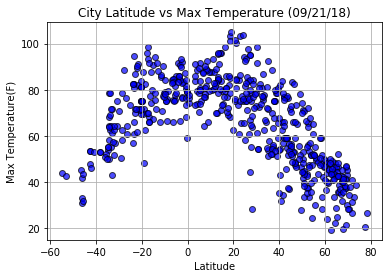

In [9]:
#City Latitude vs Max Temperature scatter plot
x_axis=data_df["Latitude"]
y_axis=data_df["Temperature"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs Max Temperature (09/21/18)")
plt.savefig('LatitudevsMaxTemperature')
plt.grid(True)
plt.show()

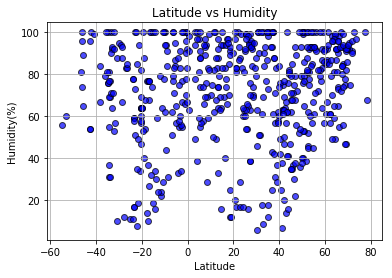

In [10]:
#Latitude vs Humidity
x_axis=data_df["Latitude"]
y_axis=data_df["Humidity"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Latitude vs Humidity")
plt.savefig("LatitudevsHumidity")
plt.grid(True)
plt.show()


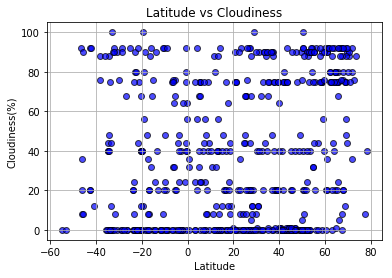

In [11]:
#Latitude vs Cloudiness
x_axis=data_df["Latitude"]
y_axis=data_df["Cloudiness"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Latitude vs Cloudiness")
plt.savefig("LatitudevsCloudiness")
plt.grid(True)
plt.show()

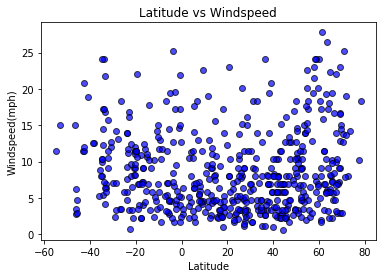

In [12]:
#Latitude vs Wind Speed
x_axis=data_df["Latitude"]
y_axis=data_df["Windspeed"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
plt.title("Latitude vs Windspeed")
plt.savefig("LatitudevsWindspeed")
plt.show()